In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('clickbait_data_preprocessed.csv')
#data.rename(columns={'all_cleaned':'text'},inplace=True)

In [6]:
data.head()

,text,label,all_cleaned
0,Should I Get Bings,1,get bings
1,Which TV Female Friend Group Do You Belong In,1,tv female friend group belong
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,new star war force awakens trailer give chill
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,vine new york celebrity big brother fuck perfect
4,A Couple Did A Stunning Photo Shoot With Their...,1,couple stun photo shoot baby learn inoperable ...


In [7]:
data.tail()

,text,label,all_cleaned
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0,make female heart flutter iraq throw shoe
31996,"British Liberal Democrat Patsy Calton, 56, die...",0,british liberal democrat patsy calton dy cancer
31997,Drone smartphone app to help heart attack vict...,0,drone smartphone app help heart attack victim ...
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0,netanyahu urge pope benedict israel denounce iran
31999,Computer Makers Prepare to Stake Bigger Claim ...,0,computer maker prepare stake big claim phone


In [8]:
data.shape

(32000, 3)

In [9]:
data.isnull().sum()

text           0
label          0
all_cleaned    2
dtype: int64

In [11]:
data["text"].value_counts()

Should I Get Bings                                                                     1
Seychelles sentences Somali pirates to ten years in prison                             1
Haiti might have to postpone elections again                                           1
PayPal freezes $20k in hurricane relief donations                                      1
8.8 magnitude earthquake hits Chile; tsunami warnings issued throughout Pacific rim    1
                                                                                      ..
BuzzFeed Crossword: Kitchen Confidential                                               1
25 Genius Spaghetti Recipes You Should Know                                            1
The New Trailer For "The Huntsman" Is Glorious                                         1
This Might Be One Of The Most Vivid Sex Ed Books Ever                                  1
Computer Makers Prepare to Stake Bigger Claim in Phones                                1
Name: text, Length: 3

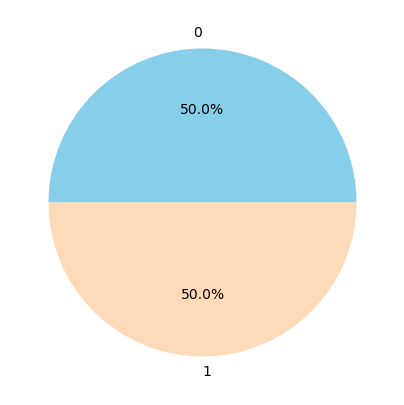

In [12]:
fig= plt.subplots(figsize=(19, 5))
g2 = plt.pie(data["label"].value_counts().values,explode=[0,0],labels=data['label'].value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])

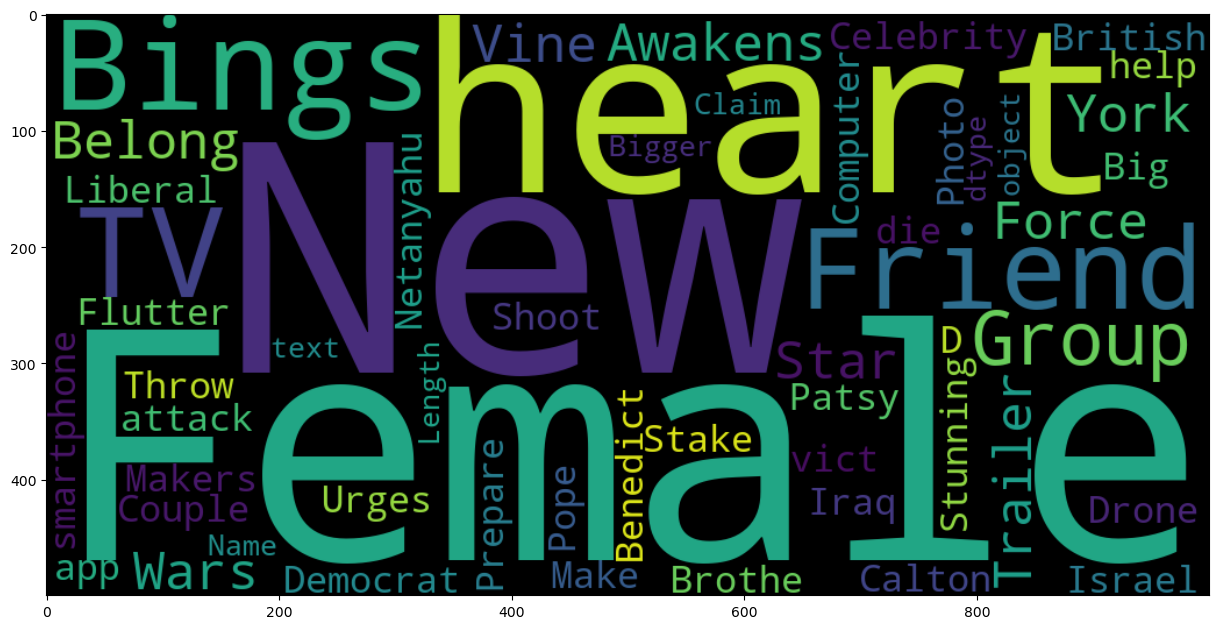

In [13]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 1000 , width = 1000 , height = 500).generate(str(data.text))
plt.imshow(wc , interpolation = 'bilinear')

Text(0.5, 1.0, 'Headline')

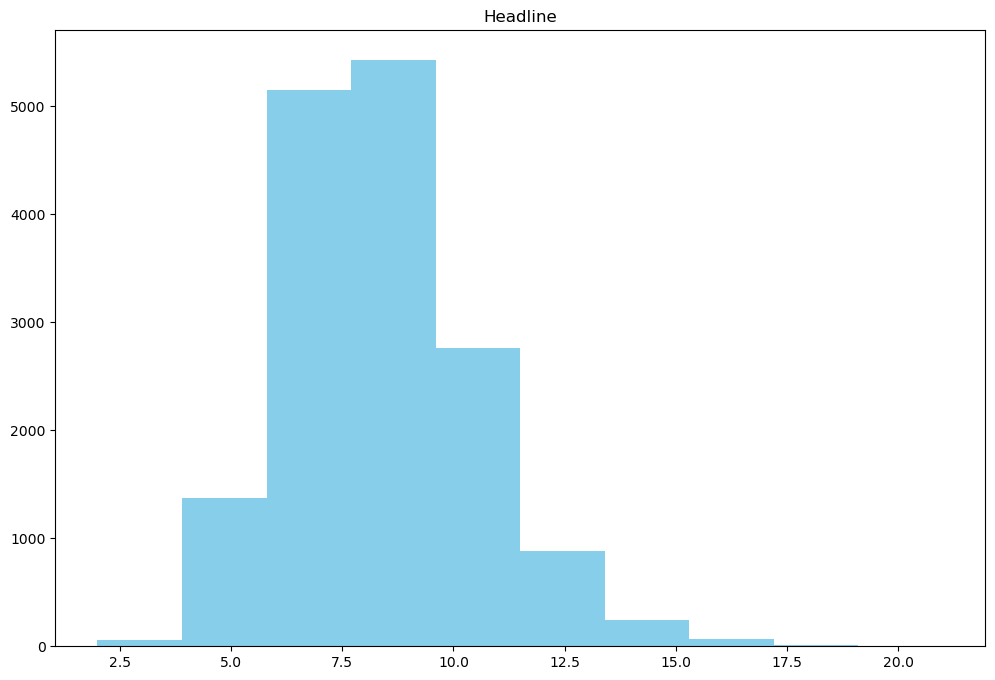

In [14]:
fig,ax1=plt.subplots(figsize=(12,8))
text_len=data[data['label']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='SkyBlue')
ax1.set_title('Headline')

In [15]:
import nltk
import seaborn as sns
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

     word  count
0  (The,)   4894
1  (You,)   4824
2   (in,)   4360
3   (to,)   3401
4   (To,)   3254


<Axes: xlabel='count', ylabel='word'>

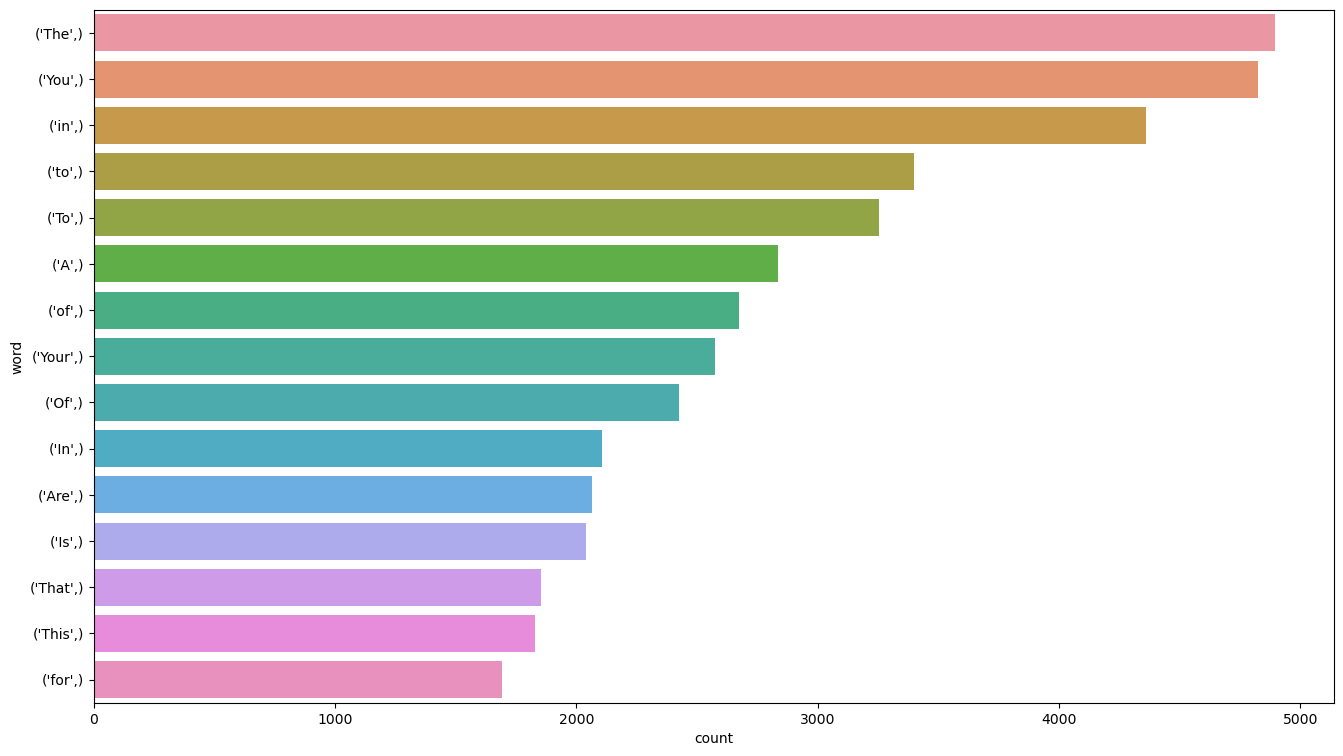

In [16]:
texts = ' '.join(data['text'])
string = texts.split(" ")
draw_n_gram(string,1)

           word  count
0    (Are, You)    757
1   (Based, On)    596
2     (Do, You)    468
3    (On, Your)    466
4  (That, Will)    444


<Axes: xlabel='count', ylabel='word'>

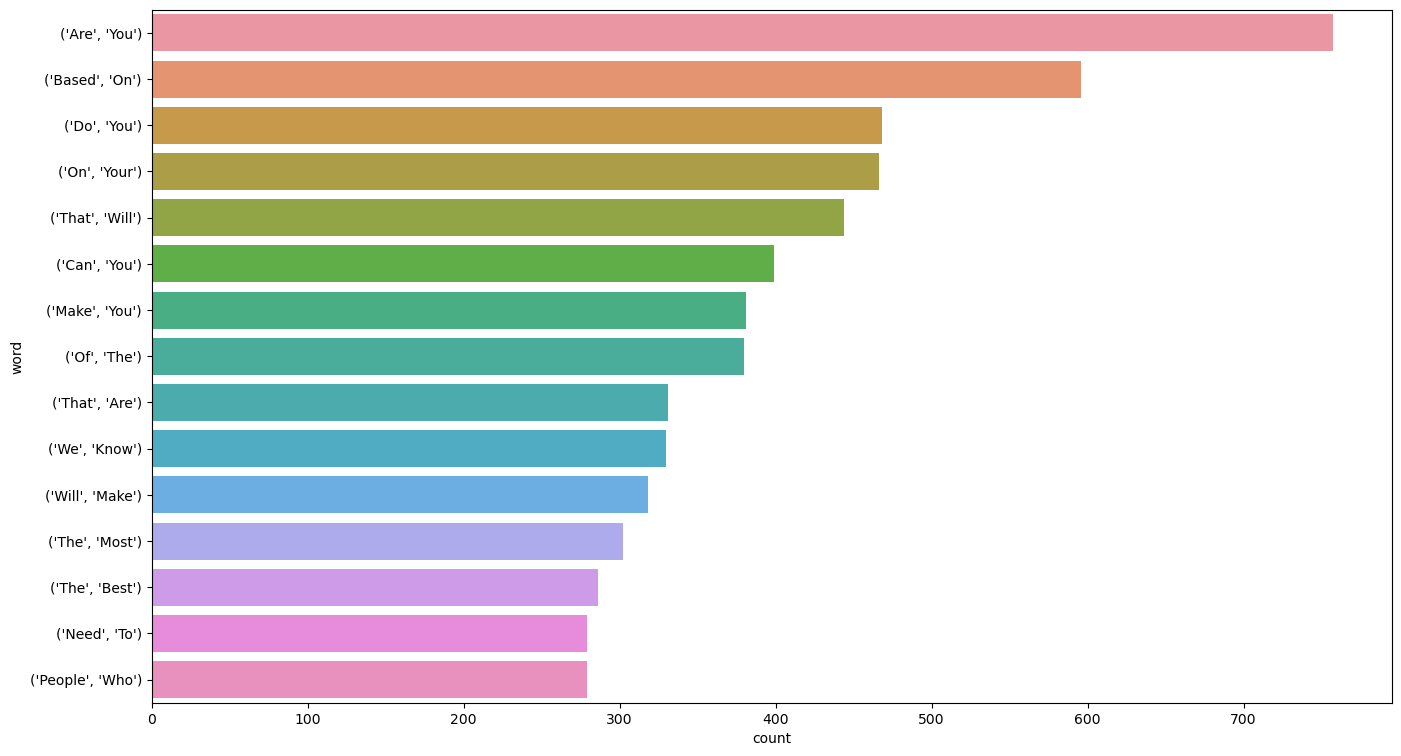

In [17]:
texts = ' '.join(data['text'])
string = texts.split(" ")
draw_n_gram(string,2)

                   word  count
0     (Based, On, Your)    440
1     (Will, Make, You)    243
2    (That, Will, Make)    222
3    (On, Your, Zodiac)    214
4  (Your, Zodiac, Sign)    207


<Axes: xlabel='count', ylabel='word'>

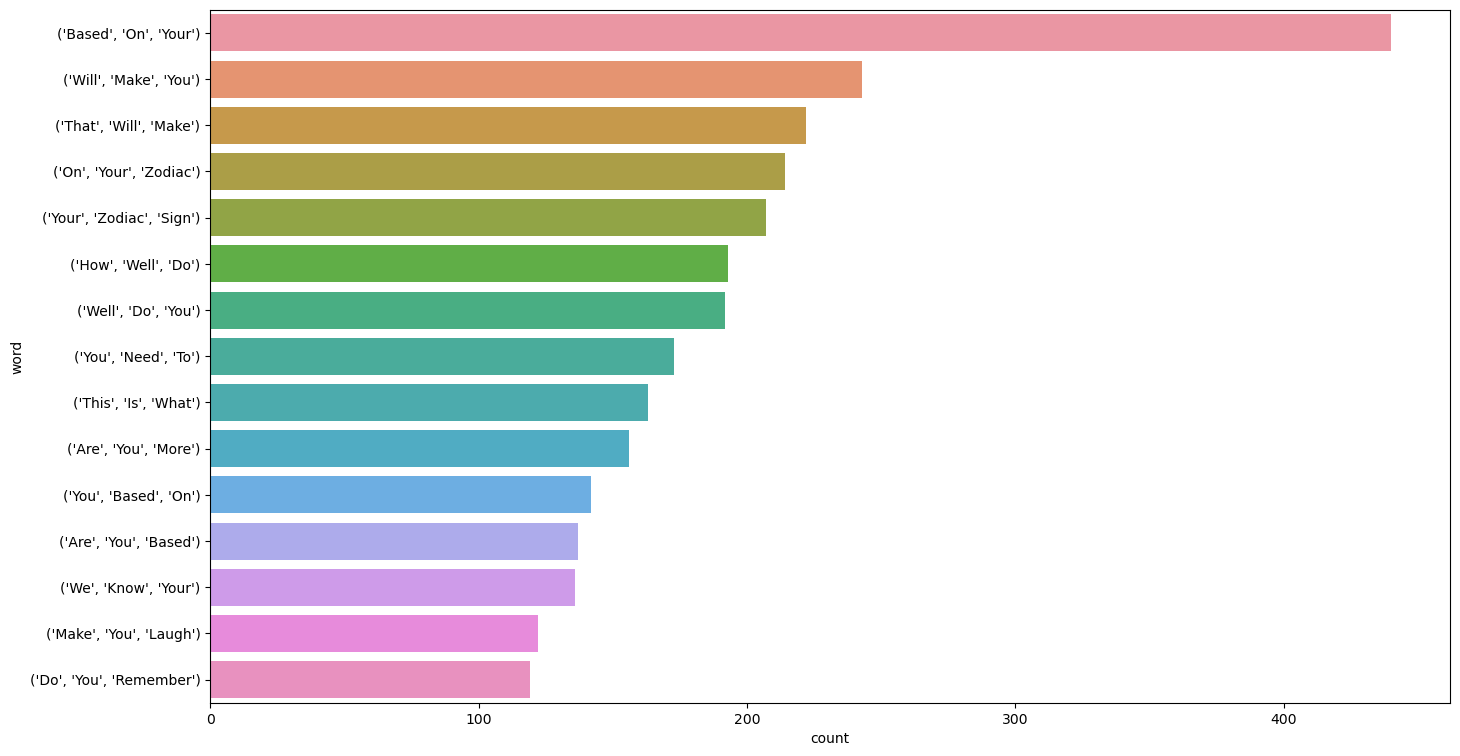

In [18]:
texts = ' '.join(data['text'])
string = texts.split(" ")
draw_n_gram(string,3)

                        word  count
0  (Based, On, Your, Zodiac)    214
1       (How, Well, Do, You)    192
2    (That, Will, Make, You)    171
3   (On, Your, Zodiac, Sign)    157
4     (You, Based, On, Your)    135


<Axes: xlabel='count', ylabel='word'>

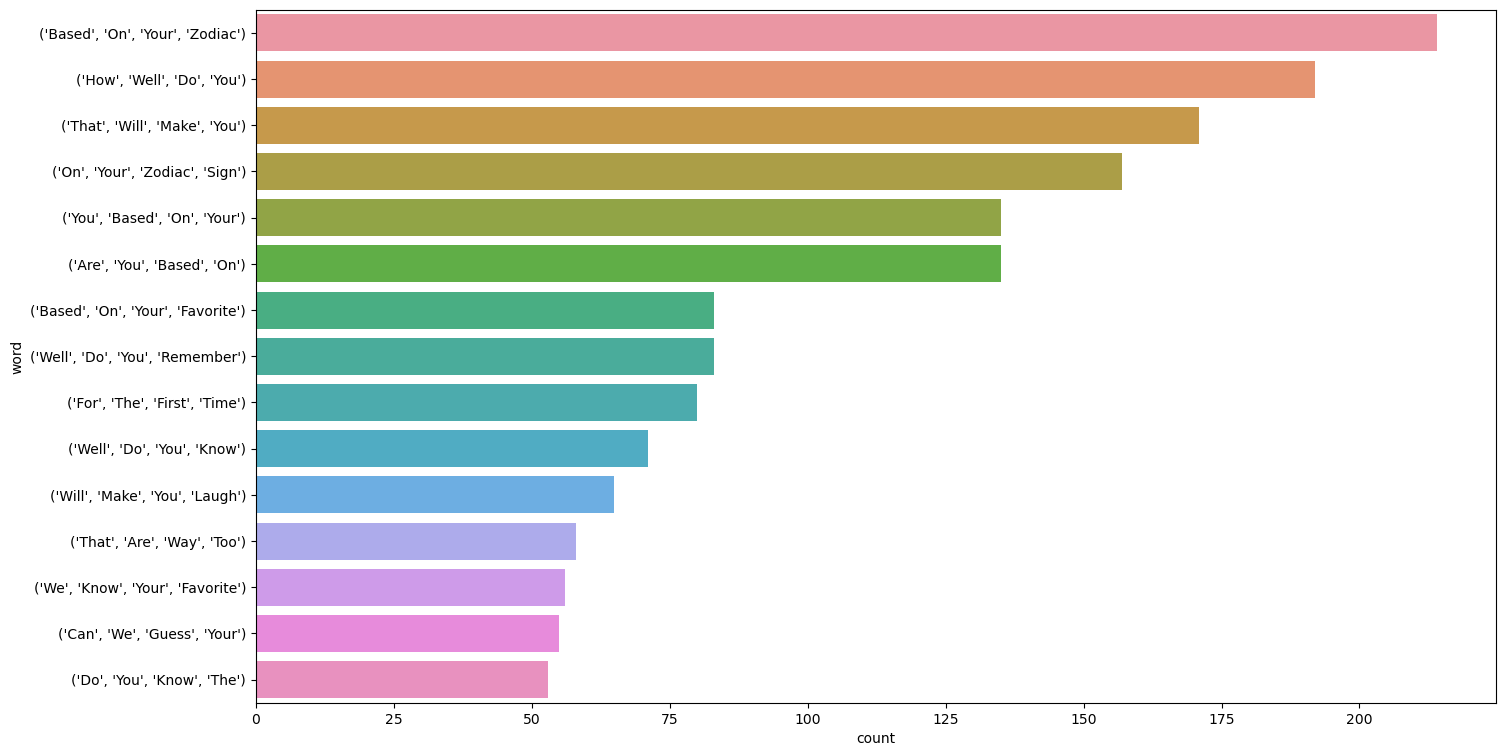

In [19]:
texts = ' '.join(data['text'])
string = texts.split(" ")
draw_n_gram(string,4)